# Projet 7 - Implementation of a scoring model
# Notebook - Interprétation

# Data sources

The webpage containing all data and descriptions: <a href="https://www.kaggle.com/c/home-credit-default-risk/data" target="_blank">here</a>.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7---Implementation-of-a-scoring-model" data-toc-modified-id="Projet-7---Implementation-of-a-scoring-model-1">Projet 7 - Implementation of a scoring model</a></span></li><li><span><a href="#Notebook---Interprétation" data-toc-modified-id="Notebook---Interprétation-2">Notebook - Interprétation</a></span></li><li><span><a href="#Data-sources" data-toc-modified-id="Data-sources-3">Data sources</a></span></li><li><span><a href="#I)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Importation-of-the-dataset-into-a-pandas-dataframe-4">I) Importation of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-4.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Importation-of-the-preprocessed-datasets" data-toc-modified-id="2)-Importation-of-the-preprocessed-datasets-4.2">2) Importation of the preprocessed datasets</a></span></li><li><span><a href="#3)-Separation-of-the-explicatives-and-the-explicated" data-toc-modified-id="3)-Separation-of-the-explicatives-and-the-explicated-4.3">3) Separation of the explicatives and the explicated</a></span></li></ul></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-5">Interpretations</a></span><ul class="toc-item"><li><span><a href="#Global" data-toc-modified-id="Global-5.1">Global</a></span><ul class="toc-item"><li><span><a href="#LightGBM-importance-parameter" data-toc-modified-id="LightGBM-importance-parameter-5.1.1">LightGBM importance parameter</a></span></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-5.1.2">SHAP</a></span><ul class="toc-item"><li><span><a href="#Library-importation" data-toc-modified-id="Library-importation-5.1.2.1">Library importation</a></span></li><li><span><a href="#Shap-explanation" data-toc-modified-id="Shap-explanation-5.1.2.2">Shap explanation</a></span></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-5.1.2.3">Interpretations</a></span></li><li><span><a href="#Save-global-interpretations" data-toc-modified-id="Save-global-interpretations-5.1.2.4">Save global interpretations</a></span></li></ul></li></ul></li><li><span><a href="#Local" data-toc-modified-id="Local-5.2">Local</a></span><ul class="toc-item"><li><span><a href="#SHAP" data-toc-modified-id="SHAP-5.2.1">SHAP</a></span><ul class="toc-item"><li><span><a href="#Shap-explanation" data-toc-modified-id="Shap-explanation-5.2.1.1">Shap explanation</a></span></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-5.2.1.2">Interpretations</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#III)-Data-drift-analysis:-Evidently" data-toc-modified-id="III)-Data-drift-analysis:-Evidently-6">III) Data drift analysis: Evidently</a></span><ul class="toc-item"><li><span><a href="#1)-Importation-of-required-libraries" data-toc-modified-id="1)-Importation-of-required-libraries-6.1">1) Importation of required libraries</a></span></li><li><span><a href="#2)-Functions" data-toc-modified-id="2)-Functions-6.2">2) Functions</a></span></li><li><span><a href="#3)-Data-drift" data-toc-modified-id="3)-Data-drift-6.3">3) Data drift</a></span><ul class="toc-item"><li><span><a href="#a)-Evidently-report" data-toc-modified-id="a)-Evidently-report-6.3.1">a) Evidently report</a></span></li><li><span><a href="#b)-Report-storage" data-toc-modified-id="b)-Report-storage-6.3.2">b) Report storage</a></span></li><li><span><a href="#c)-SHAP-values-of-features-with-significant-data-drift" data-toc-modified-id="c)-SHAP-values-of-features-with-significant-data-drift-6.3.3">c) SHAP values of features with significant data drift</a></span></li></ul></li><li><span><a href="#4)-Simulation-overtime" data-toc-modified-id="4)-Simulation-overtime-6.4">4) Simulation overtime</a></span><ul class="toc-item"><li><span><a href="#a)-Functions" data-toc-modified-id="a)-Functions-6.4.1">a) Functions</a></span></li><li><span><a href="#b)-Simulation" data-toc-modified-id="b)-Simulation-6.4.2">b) Simulation</a></span></li><li><span><a href="#c)-Results" data-toc-modified-id="c)-Results-6.4.3">c) Results</a></span><ul class="toc-item"><li><span><a href="#i.-Shows-the-HTML-table-of-the-last-report" data-toc-modified-id="i.-Shows-the-HTML-table-of-the-last-report-6.4.3.1">i. Shows the HTML table of the last report</a></span></li><li><span><a href="#ii.-Checking-the-importance-of-the-drifted-features" data-toc-modified-id="ii.-Checking-the-importance-of-the-drifted-features-6.4.3.2">ii. Checking the importance of the drifted features</a></span></li></ul></li></ul></li></ul></li></ul></div>

# I) Importation of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [1]:
### File management ###

# Files' path.
import os.path

# Save and load files.
import csv
import pickle


### Data manipulations ###

import numpy as np
import pandas as pd


### Date & time ###

# Time measurment and datetime management
import datetime as dt
from time import time


### Warnings removal ###

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data visualizations ###

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns


### Custom functions ###

# Get the SHAP explanations (Both global and local) + df categorical columns finder/marker and df memory optimizer.
from shared_functions import interpretability_shap, reduce_memory, find_int_cols

In [118]:
IMPORTS_DIR_PATH = r'Exports\Preprocessed_data'
EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried'
SELECTED_MODEL_DIR_PATH = r'Exports\Models\Selected' 
SHAP_INTERPRETATIONS_DIR_PATH = r'Exports\Feature_interpretation\SHAP'

PKL_MODELS_FILE = 'models_info.pkl'
PKL_MODEL_FILE = 'selected_model.pkl'

## 2) Importation of the preprocessed datasets

In [3]:
df_train = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
#df_valid = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_valid.csv'))
df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))
#df_new_customers = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_new_customers.csv'))

In [4]:
# Set the customer IDs as indeces.
df_train = df_train.set_index('SK_ID_CURR')
df_test = df_test.set_index('SK_ID_CURR')

In [5]:
%%time

df_train = find_int_cols(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 113355.0 to 101466.0
Columns: 169 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float64(112), int64(57)
memory usage: 31.1 MB
CPU times: total: 3.72 s
Wall time: 3.72 s


In [6]:
df_train = reduce_memory(df_train)

Initial df memory usage is 31.13 MB for 169 columns
Final memory usage is: 8.93 MB - decreased by 71.3%


In [7]:
df_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 113355.0 to 101466.0
Data columns (total 169 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    NAME_CONTRACT_TYPE                     int8   
 1    CODE_GENDER                            int8   
 2    FLAG_OWN_CAR                           int8   
 3    AMT_INCOME_TOTAL                       float32
 4    AMT_CREDIT                             float32
 5    AMT_ANNUITY                            float32
 6    AMT_GOODS_PRICE                        float32
 7    NAME_TYPE_SUITE                        int8   
 8    NAME_INCOME_TYPE                       int8   
 9    NAME_EDUCATION_TYPE                    int8   
 10   NAME_FAMILY_STATUS                     int8   
 11   NAME_HOUSING_TYPE                      int8   
 12   REGION_POPULATION_RELATIVE             float16
 13   DAYS_BIRTH                             int16  
 14   DAYS_EMPLOYED                  

## 3) Separation of the explicatives and the explicated

In [8]:
X_TRAIN = df_train.drop('TARGET', axis=1)
y_TRAIN = df_train['TARGET']

#X_VALID = df_valid.drop('TARGET', axis=1)
#y_VALID = df_valid['TARGET']

X_TEST = df_test.drop('TARGET', axis=1)
y_TEST = df_test['TARGET']

In [9]:
#model_pl_label = 'wt_lgbm_clf_fine_opt'

# Load the last values calculated for the hyperparameters.
#df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')
#model_pl_opt = df_MODELS.loc[model_pl_label, 'Models']

# Load the serialized model.
model_pl_opt = pickle.load(open(os.path.join(SELECTED_MODEL_DIR_PATH, PKL_MODEL_FILE), "rb"))
model_pl_opt

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
                                learning_rate=0.18, max_depth=20,
                                min_child_weight=6, n_estimators=22,
                                objective='binary', random_state=0,
                                reg_alpha=0.1, reg_lambda=0.001,
                                subsample=0.9)]])

# Interpretations

## Global

### LightGBM importance parameter

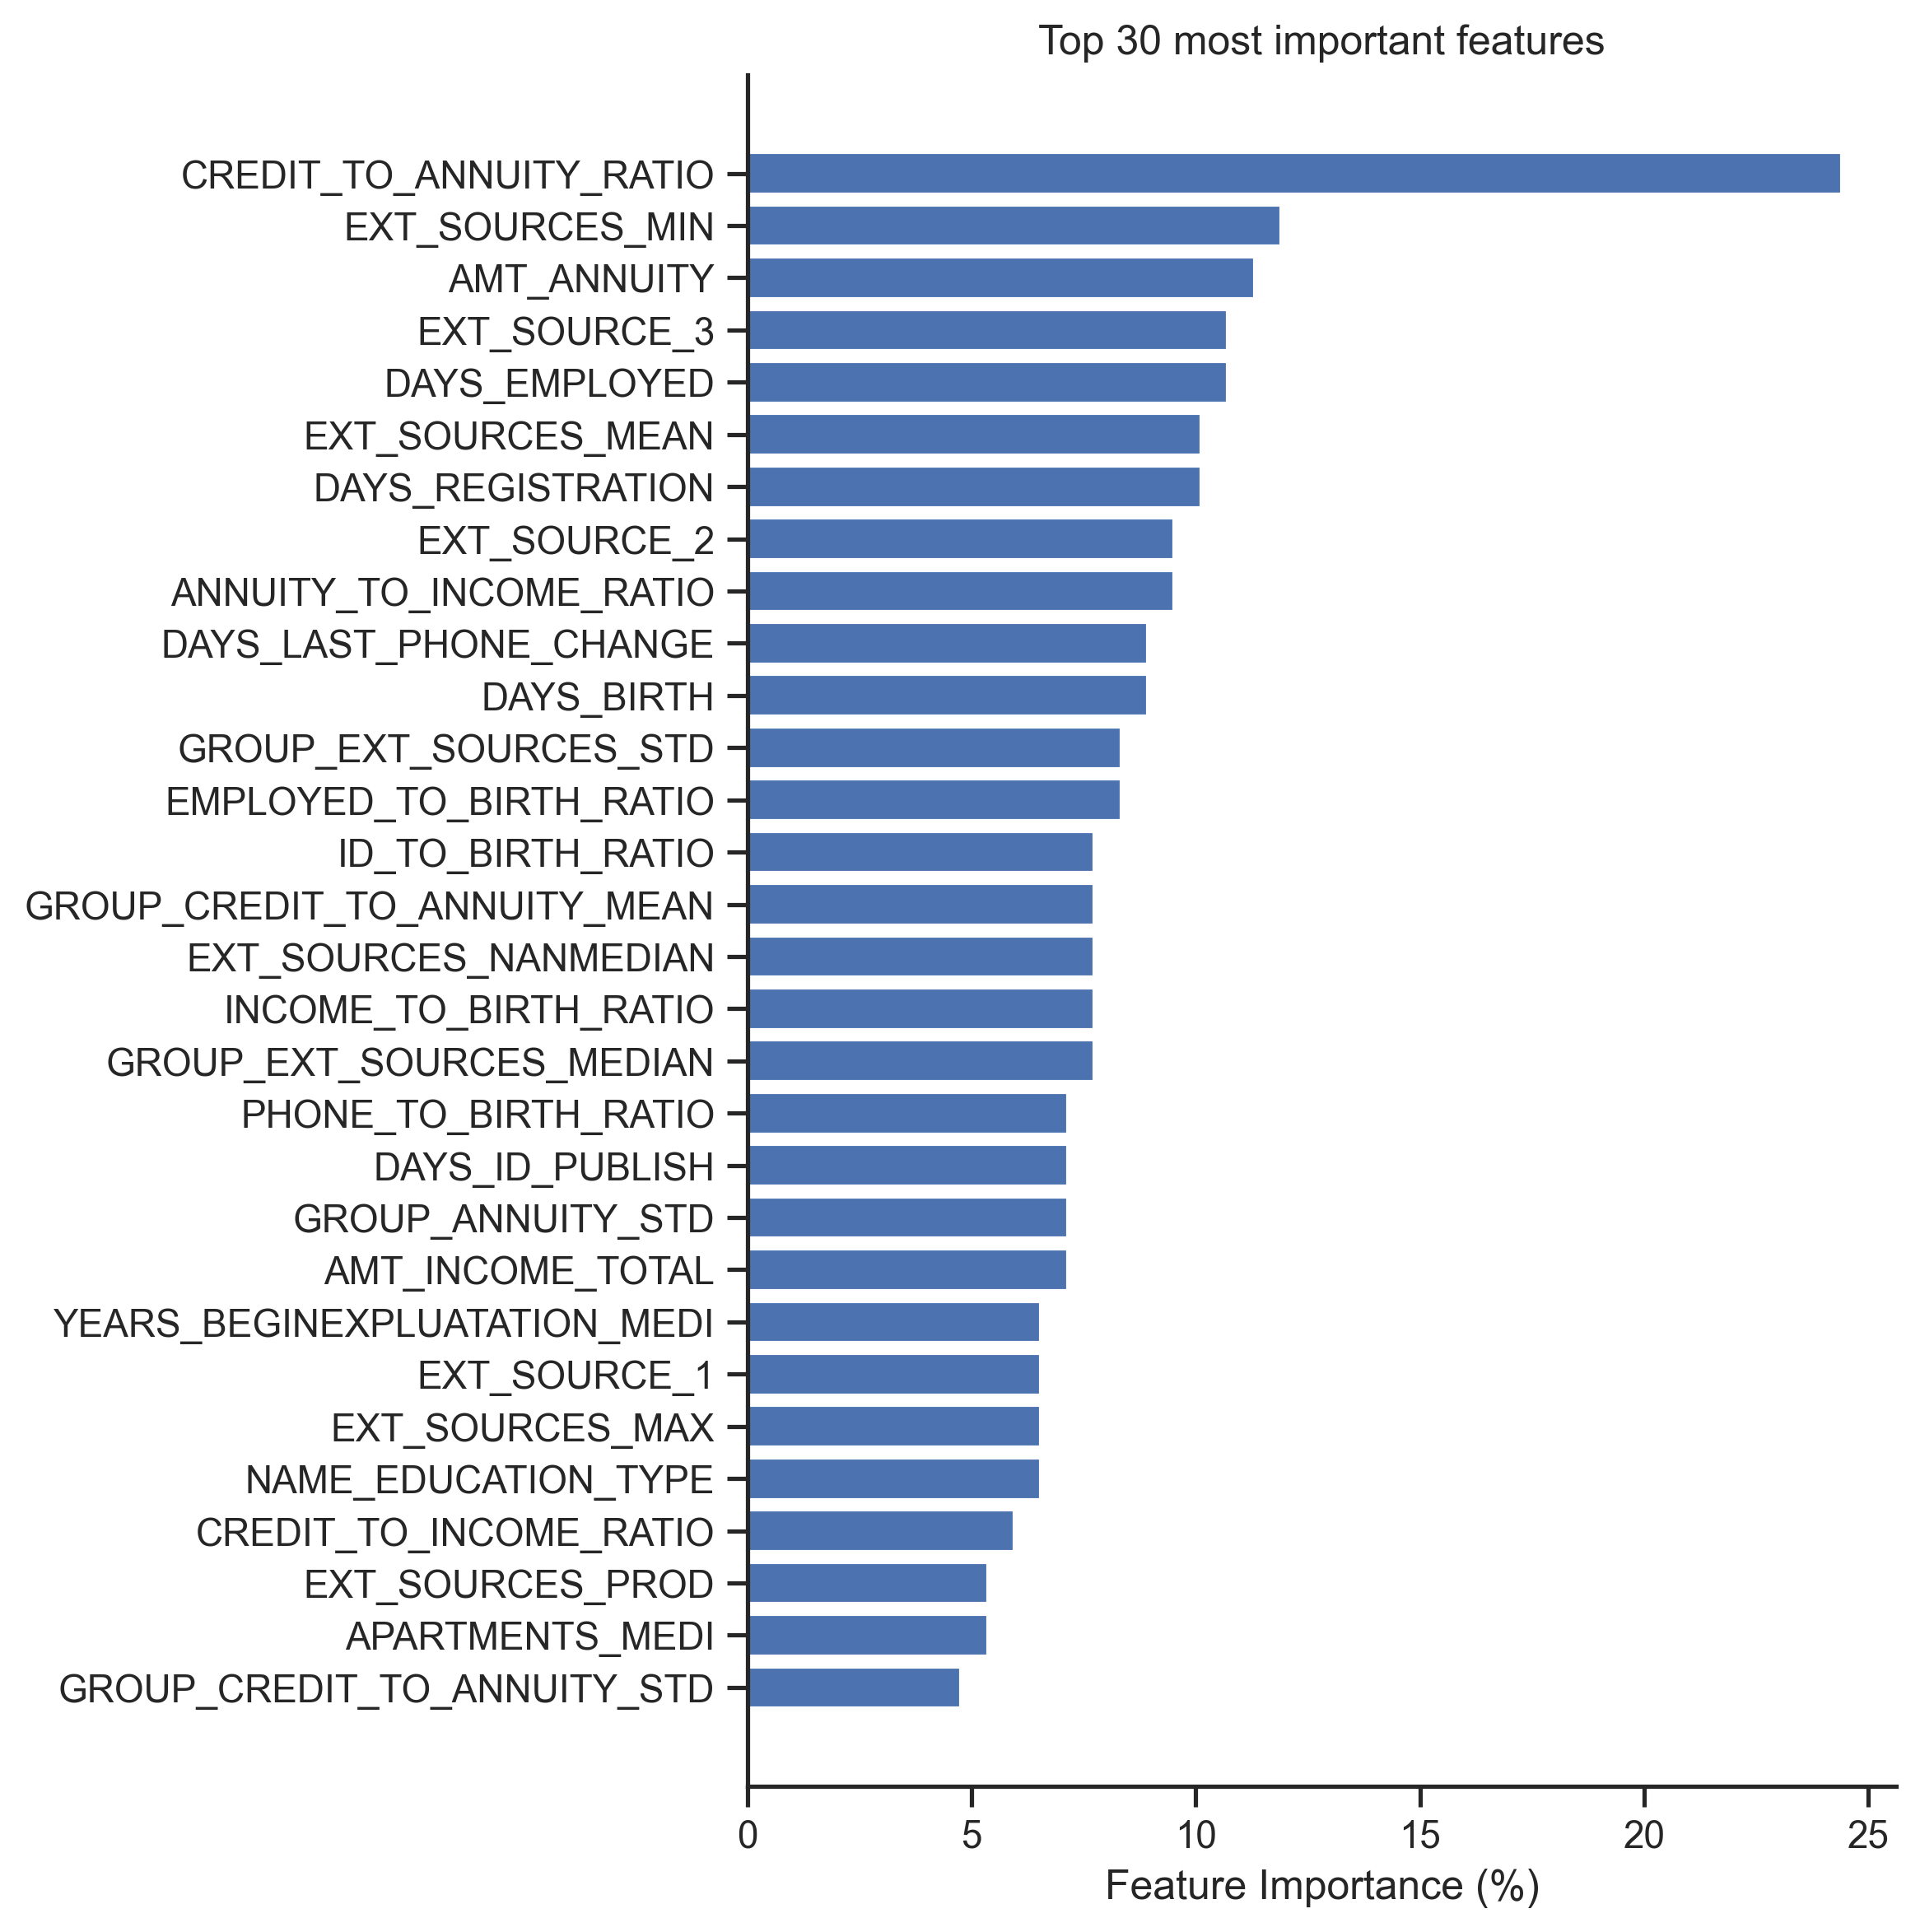

In [10]:
n_top_fts = 30

#model_pl_opt['model'].fit(X_TRAIN, y_TRAIN)

npa_top_fts = model_pl_opt['model'].feature_importances_.argsort()#[-n_top_fts:]

plt.figure(figsize=(6,9), dpi=300)

plt.barh(X_TRAIN.columns[npa_top_fts[-n_top_fts:]], model_pl_opt['model'].\
         feature_importances_[npa_top_fts[-n_top_fts:]] / len(X_TRAIN.columns) * 100)

plt.xlabel("Feature Importance (%)")
plt.title("Top %i most important features" % n_top_fts)

plt.show()

### SHAP

- doc 1: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html
- doc 2: https://shap-lrjball.readthedocs.io/en/latest/generated/shap.dependence_plot.html

*NB: More about Kernel Explainer and its requirements for big datasets that Tree explainer bypasses:* https://colab.research.google.com/drive/1pjPzsw_uZew-Zcz646JTkRDhF2GkPk0N#scrollTo=SCOJFGMj3fq5

#### Library importation

In [11]:
import shap

shap.initjs()

#### Shap explanation

- Different explainers: https://snyk.io/advisor/python/shap/functions/shap.explainers.explainer.Explainer
- Background data or not & feature_perturbation = "interventional" or "tree_path_dependent" ? https://github.com/slundberg/shap/issues/1098 <br>
=> Background data: Closer to the model. <br>

*NB: According to the model (classifier or regressor) and the presence or not of background data, some graphics (such as shap.plots.bar()) won't behave the same way and might not be usable (for the classifiers mainly). Ex: shap.plots.bar can replaced by shap.plot_bar but such graphics are less detailed (as it can be noticed in a couple of cells below).*

In [12]:
%%time

# Select the number of the most important features to keep.
top_ft = 10

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the model and the scaler of the pipeline separatly.
# NB: Because the model type 'imblearn.pipeline.Pipeline' is not yet supported by TreeExplainer. 
#model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
#model_pl = df_MODELS.loc[model_pl_label]['Models']
#scaler = model_pl['scaler']
#model = model_pl['model']
scaler = model_pl_opt['scaler']
model = model_pl_opt['model']

# Get the SHAP explanations of the observation.
explanations_global, delta_t = interpretability_shap(model, scaler,
                                              X_TRAIN, X_TEST,
                                              cat_class=cat_class)



# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = model_pl_opt.predict_proba(X_TRAIN).mean(axis=0)
yhat_shap_base_value_mean = explanations_global.base_values.mean(axis=0)

CPU times: total: 5.38 s
Wall time: 5.17 s


In [13]:
# Summarize relevant values.
print("Model used:\n", model)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications (0) or denied (1)): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %s class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", model_pl_opt.predict_proba(X_TEST)[0])
print()
#print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

Model used:
 LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
               learning_rate=0.18, max_depth=20, min_child_weight=6,
               n_estimators=22, objective='binary', random_state=0,
               reg_alpha=0.1, reg_lambda=0.001, subsample=0.9)

Model mean prediction probabilities on train data: [0.62664676 0.37335324]

Model mean proportions of the 0 class predictions (=> Ratio of accepted applications (0) or denied (1)): 0.627
SHAP expected mean proportions of the 0 class predictions: 0.645
SHAP explanation reliability index = 0.981

Model prediction probabilities for the tested data: [0.47371751 0.52628249]




#### Interpretations

__- Mean absolute shapley values__

In [14]:
# Get the most important features according to SHAP for the global features interpretation.
global_features = pd.DataFrame(explanations_global.values, columns = X_TRAIN.columns).apply(lambda x: np.mean(abs(x))).sort_values(ascending=False)
global_features

EXT_SOURCES_MEAN                 0.059313
CREDIT_TO_ANNUITY_RATIO          0.024476
EXT_SOURCE_3                     0.020023
EXT_SOURCES_MAX                  0.019675
EXT_SOURCES_MIN                  0.019060
                                   ...   
INS_PAID_OVER_MEAN               0.000000
INS_DPD_15_MEAN                  0.000000
INS_DPD_7_MEAN                   0.000000
INS_LATE_PAYMENT_RATIO_MEAN      0.000000
PAYMENT_MEAN_TO_ANNUITY_RATIO    0.000000
Length: 168, dtype: float64

In [15]:
# Get the threshold above which features can be considered very important for the model.
top_10_shap_value_thr = round(global_features[:10].values[-1], 3)
top_10_shap_value_thr

0.014

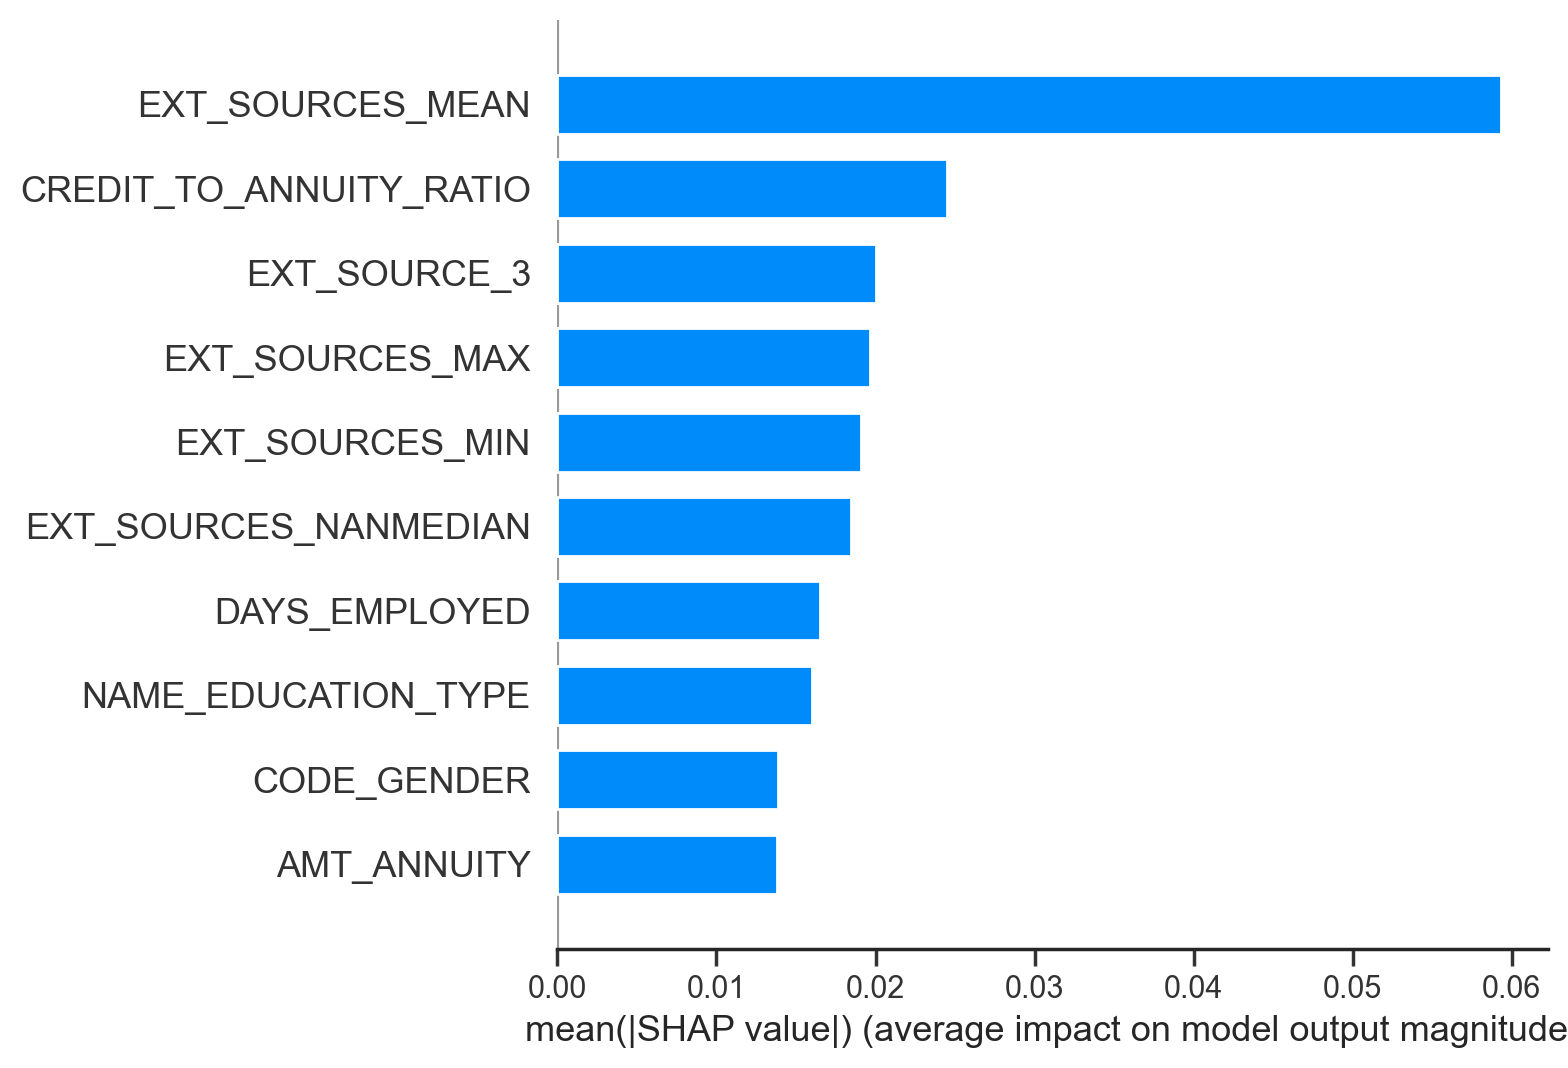

In [16]:
# Method 1:
shap.summary_plot(explanations_global, max_display=top_ft, plot_type='bar') #feature_names=X_TEST.columns,

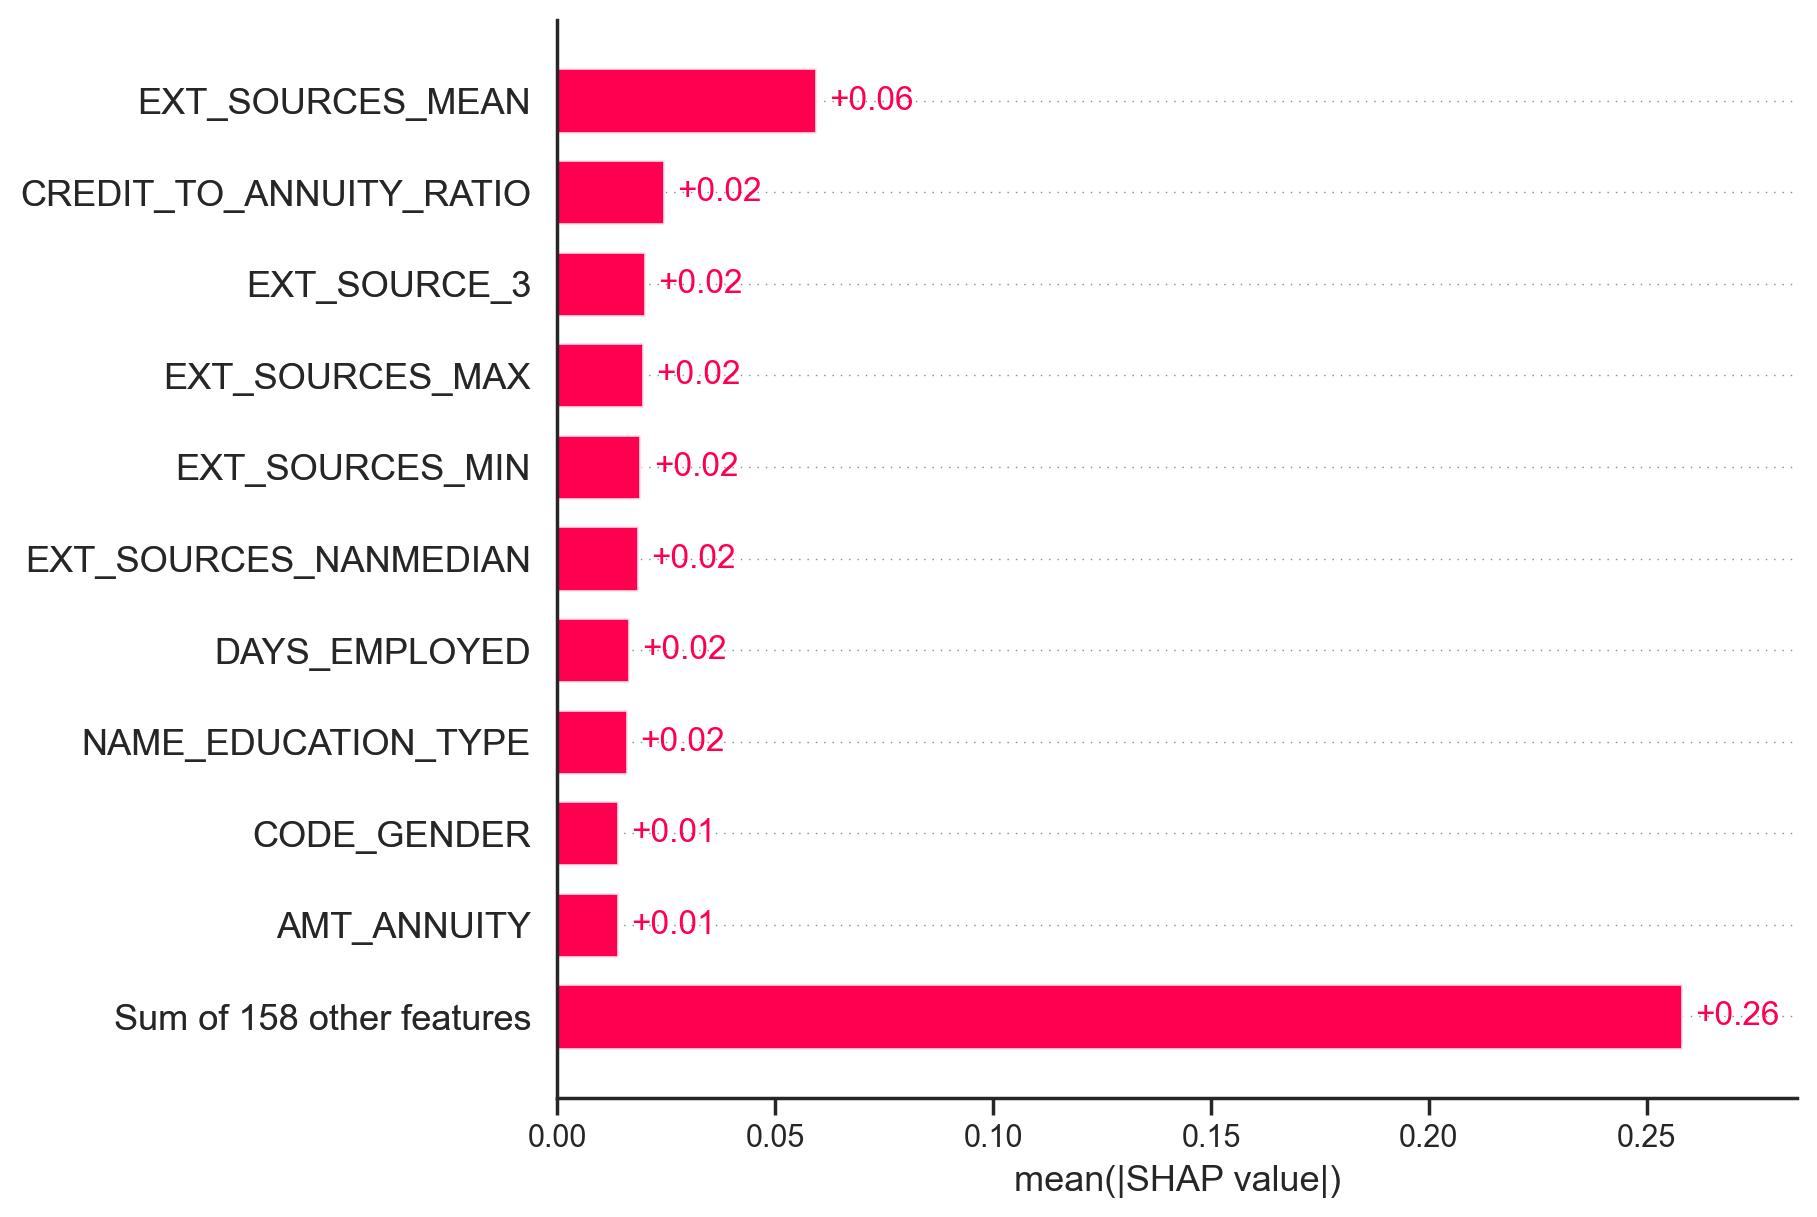

In [17]:
# Method 2 (with the absolute mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations_global, max_display=top_ft+1)

In [18]:
# Method 3 (with the shapley values as text):
# Source: https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")
        
print_feature_importances_shap_values(explanations_global, X_TEST.columns)

EXT_SOURCES_MEAN -> 0.0593 (softmax = 0.0063)
CREDIT_TO_ANNUITY_RATIO -> 0.0245 (softmax = 0.0061)
EXT_SOURCE_3 -> 0.0200 (softmax = 0.0061)
EXT_SOURCES_MAX -> 0.0197 (softmax = 0.0061)
EXT_SOURCES_MIN -> 0.0191 (softmax = 0.0060)
EXT_SOURCES_NANMEDIAN -> 0.0185 (softmax = 0.0060)
DAYS_EMPLOYED -> 0.0165 (softmax = 0.0060)
NAME_EDUCATION_TYPE -> 0.0160 (softmax = 0.0060)
CODE_GENDER -> 0.0139 (softmax = 0.0060)
AMT_ANNUITY -> 0.0138 (softmax = 0.0060)
ANNUITY_TO_INCOME_RATIO -> 0.0132 (softmax = 0.0060)
EMPLOYED_TO_BIRTH_RATIO -> 0.0103 (softmax = 0.0060)
INCOME_TO_BIRTH_RATIO -> 0.0102 (softmax = 0.0060)
DAYS_BIRTH -> 0.0089 (softmax = 0.0060)
EXT_SOURCE_2 -> 0.0088 (softmax = 0.0060)
EXT_SOURCES_PROD -> 0.0085 (softmax = 0.0060)
FLAG_DOCUMENT_3 -> 0.0076 (softmax = 0.0060)
NEW_DOC_KURT -> 0.0075 (softmax = 0.0060)
CREDIT_TO_INCOME_RATIO -> 0.0075 (softmax = 0.0060)
GROUP_CREDIT_TO_ANNUITY_MEAN -> 0.0070 (softmax = 0.0060)
DAYS_REGISTRATION -> 0.0070 (softmax = 0.0060)
CAR_TO_BIRTH_RA

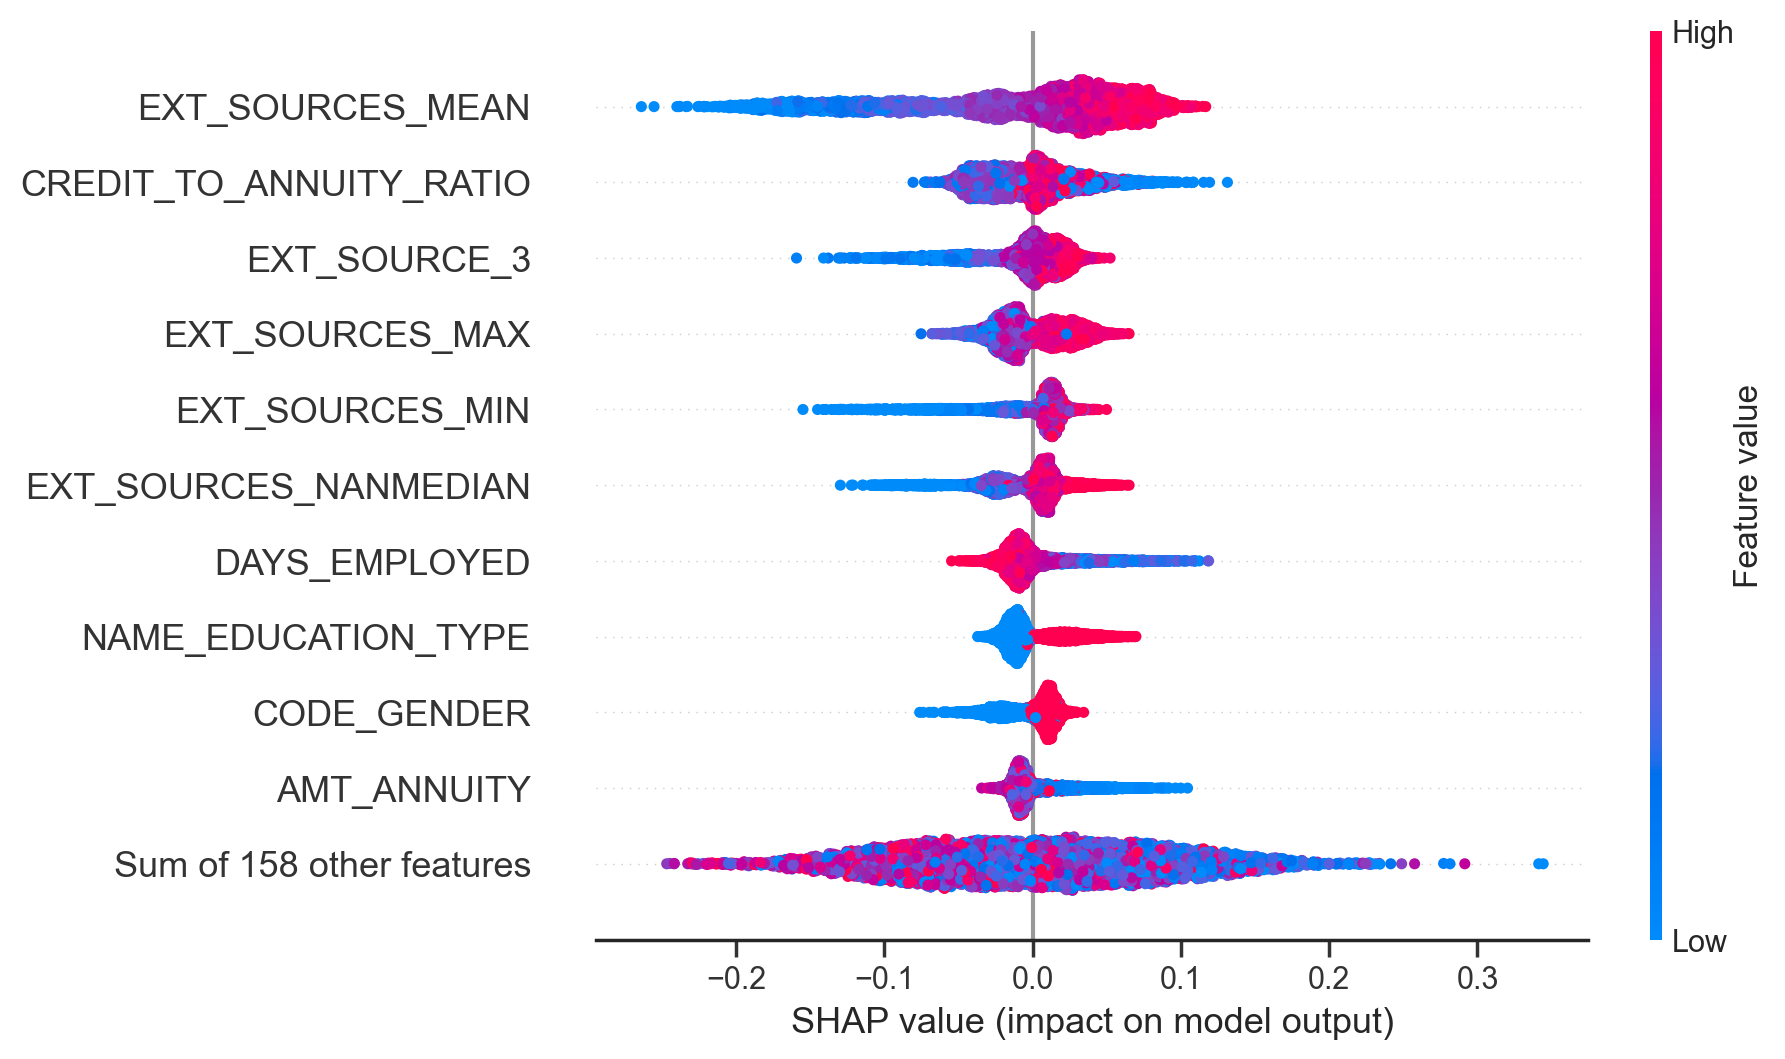

In [19]:
# Method 4 (Beeswarm):
# NB: Equivalent plot: shap.summary_plot(explanations, X_test_norm, feature_names=X_TEST.columns, max_display=top_ft, plot_type='dot')
shap.plots.beeswarm(explanations_global, max_display=top_ft+1)

__- Features' influences and dependences__

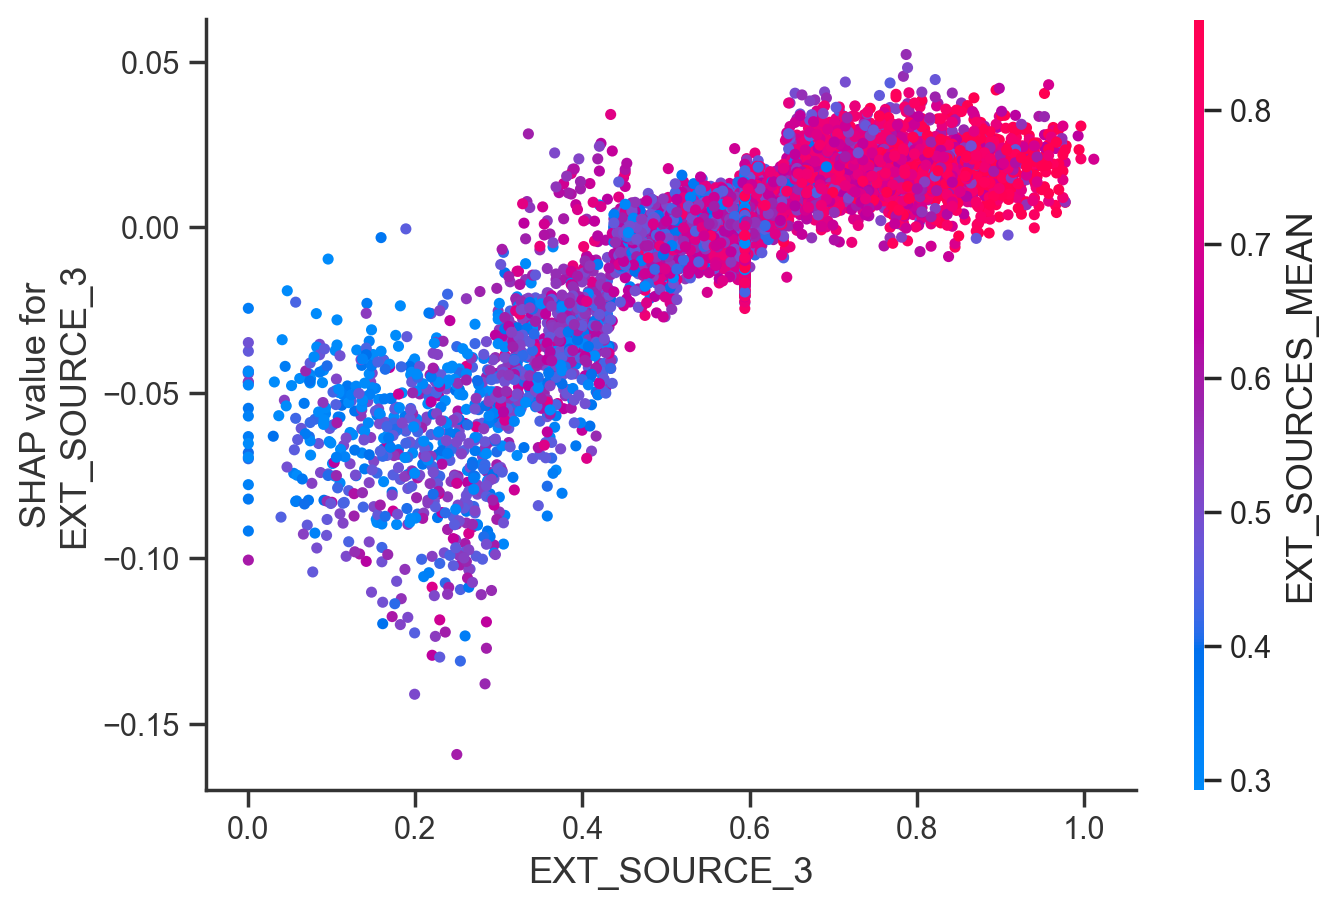

In [20]:
# Detail features influences on predictions.
X_test_norm = pd.DataFrame(scaler.transform(X_TEST), columns=X_TEST.columns)
shap.dependence_plot('EXT_SOURCE_3', explanations_global.values, X_test_norm, interaction_index='EXT_SOURCES_MEAN') #feature_names=X_TEST.columns

#### Save global interpretations

In [119]:
# Create or overwrite the file containing the report.
with open(os.path.join(SHAP_INTERPRETATIONS_DIR_PATH, 'global_shap_explanations.pkl'), "wb") as explanations_global_file:
    pickle.dump(explanations_global, explanations_global_file)

## Local

### SHAP

#### Shap explanation

In [21]:
# Select the customer to observe by its ID.
customer_id = 118485 #118464

# Select the number of the most important features to show.
top_ft = 10

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the model and the scaler of the pipeline.
#model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
#model_pl = df_MODELS.loc[model_pl_label]['Models']
#scaler = model_pl['scaler']
#model = model_pl['model']
scaler = model_pl_opt['scaler']
model = model_pl_opt['model']

# Get the corresponding customer index within the df or numpy array.
#customer_df_idx = list(df_test.index).index(customer_id)

# Get the SHAP explanations of the observation.
explanations_local, delta_t = interpretability_shap(model, scaler,
                                              X_TRAIN, X_TEST.loc[[customer_id]],
                                              cat_class=cat_class)

# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = model_pl_opt.predict_proba(X_TRAIN).mean(axis=0)
yhat_shap_base_value_mean = explanations_local.base_values.mean(axis=0)

In [22]:
# Summarize relevant values.
print("Model used:\n", model)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications (0) or denied (1)): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %s class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", model_pl_opt.predict_proba(X_TEST.loc[[customer_id]])[0])
print()
print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

Model used:
 LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
               learning_rate=0.18, max_depth=20, min_child_weight=6,
               n_estimators=22, objective='binary', random_state=0,
               reg_alpha=0.1, reg_lambda=0.001, subsample=0.9)

Model mean prediction probabilities on train data: [0.62664676 0.37335324]

Model mean proportions of the 0 class predictions (=> Ratio of accepted applications (0) or denied (1)): 0.627
SHAP expected mean proportions of the 0 class predictions: 0.645
SHAP explanation reliability index = 0.981

Model prediction probabilities for the tested data: [0.25405642 0.74594358]

SHAP explainer run time: 0.02 s



#### Interpretations

__- Mean absolute shapley values__

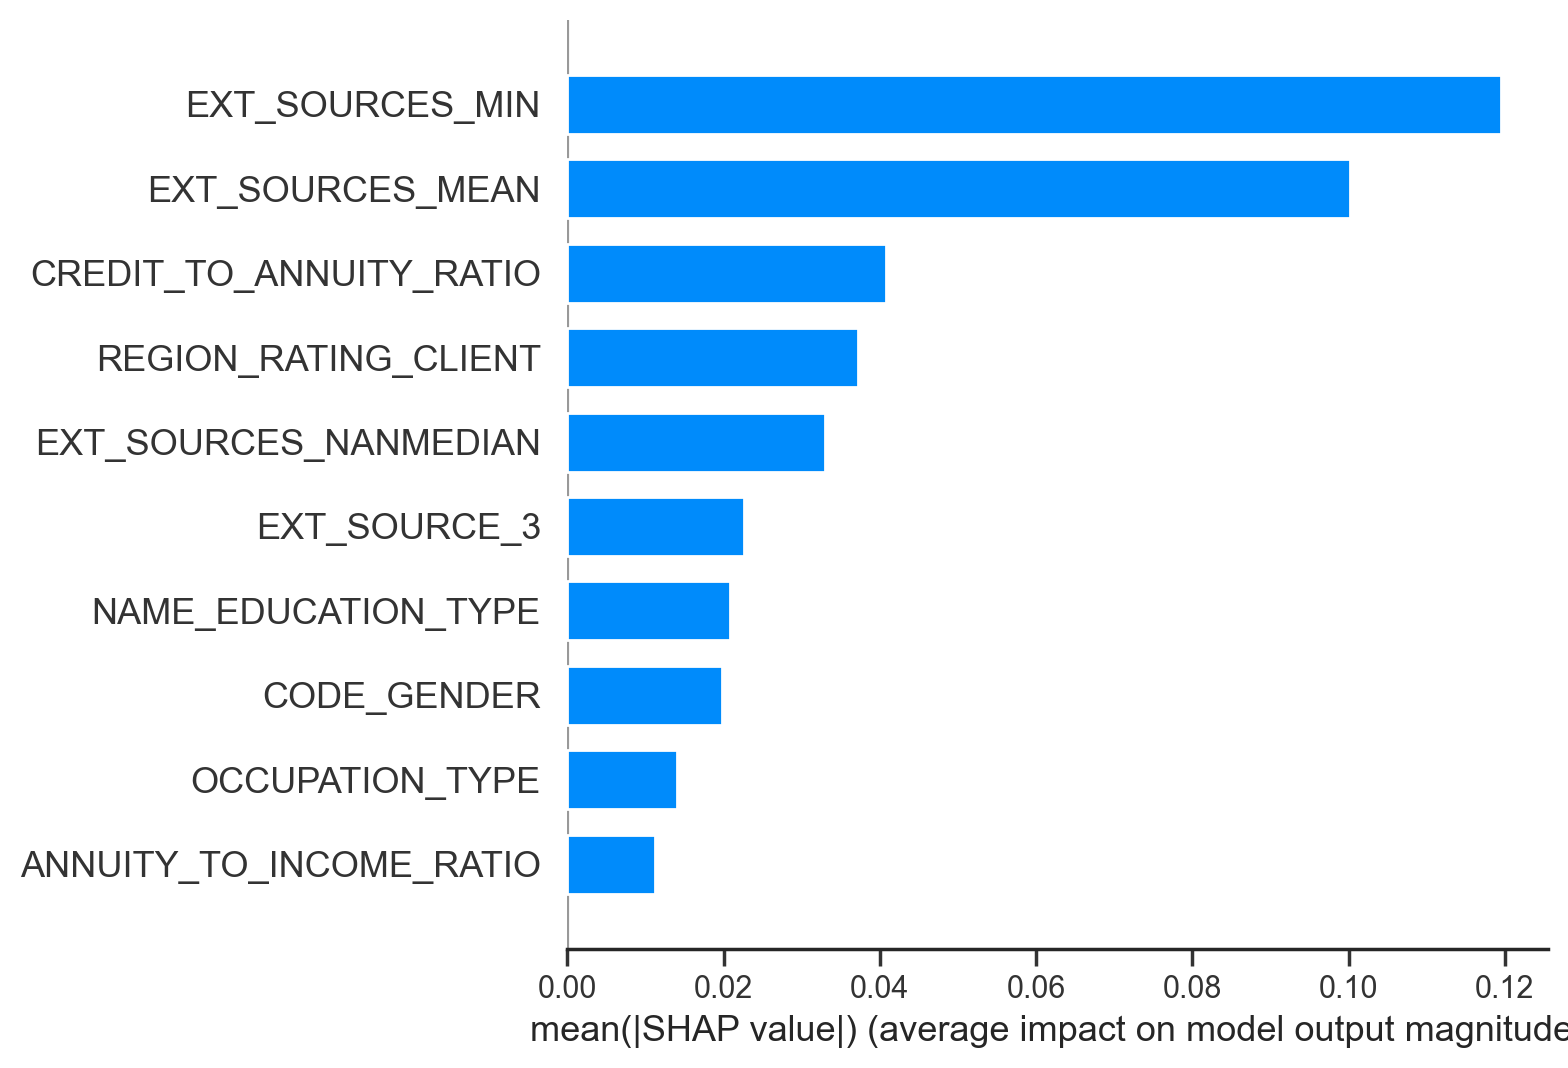

In [23]:
# Method 1:
shap.summary_plot(explanations_local, max_display=top_ft, plot_type='bar') #feature_names=X_TEST.columns,

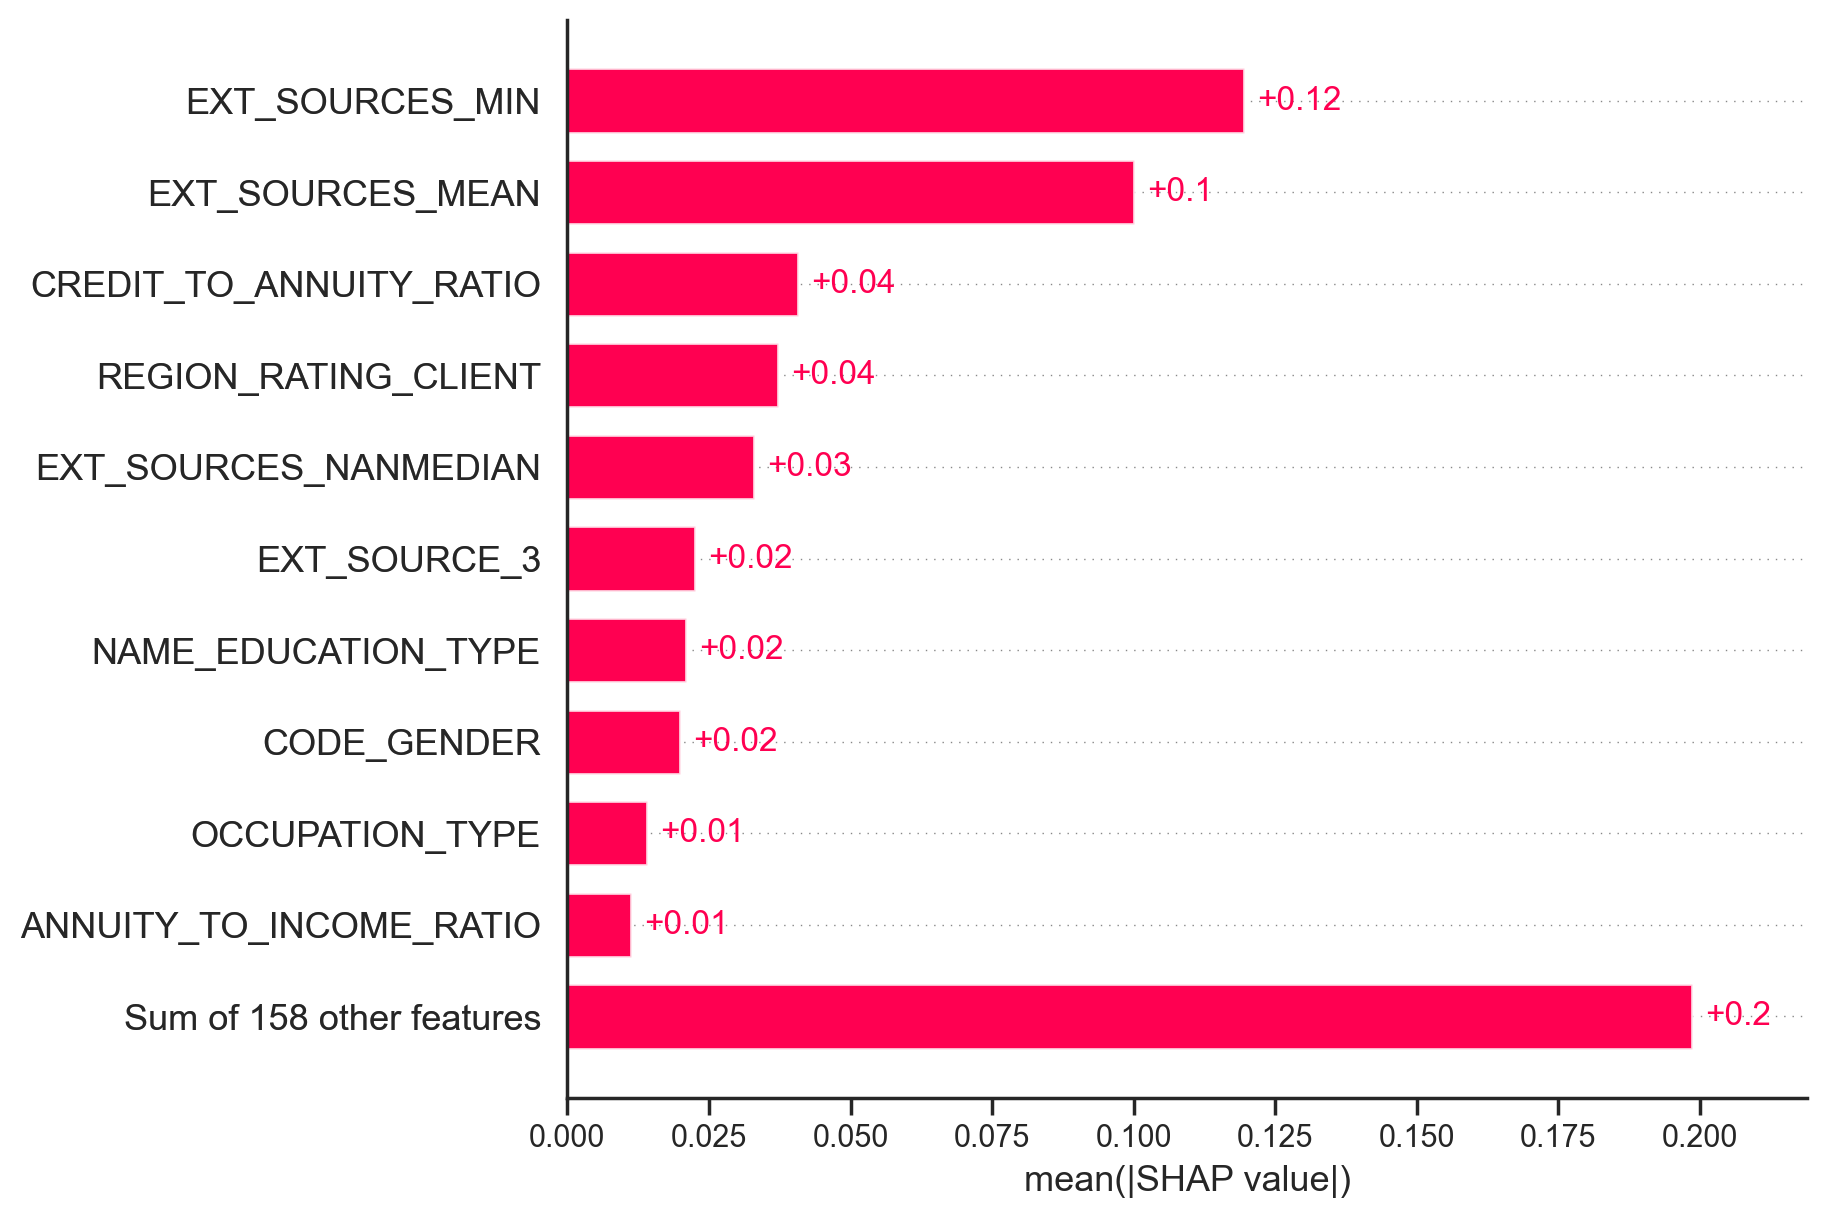

In [24]:
# Method 2 (with the absolute mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations_local, max_display=top_ft+1)

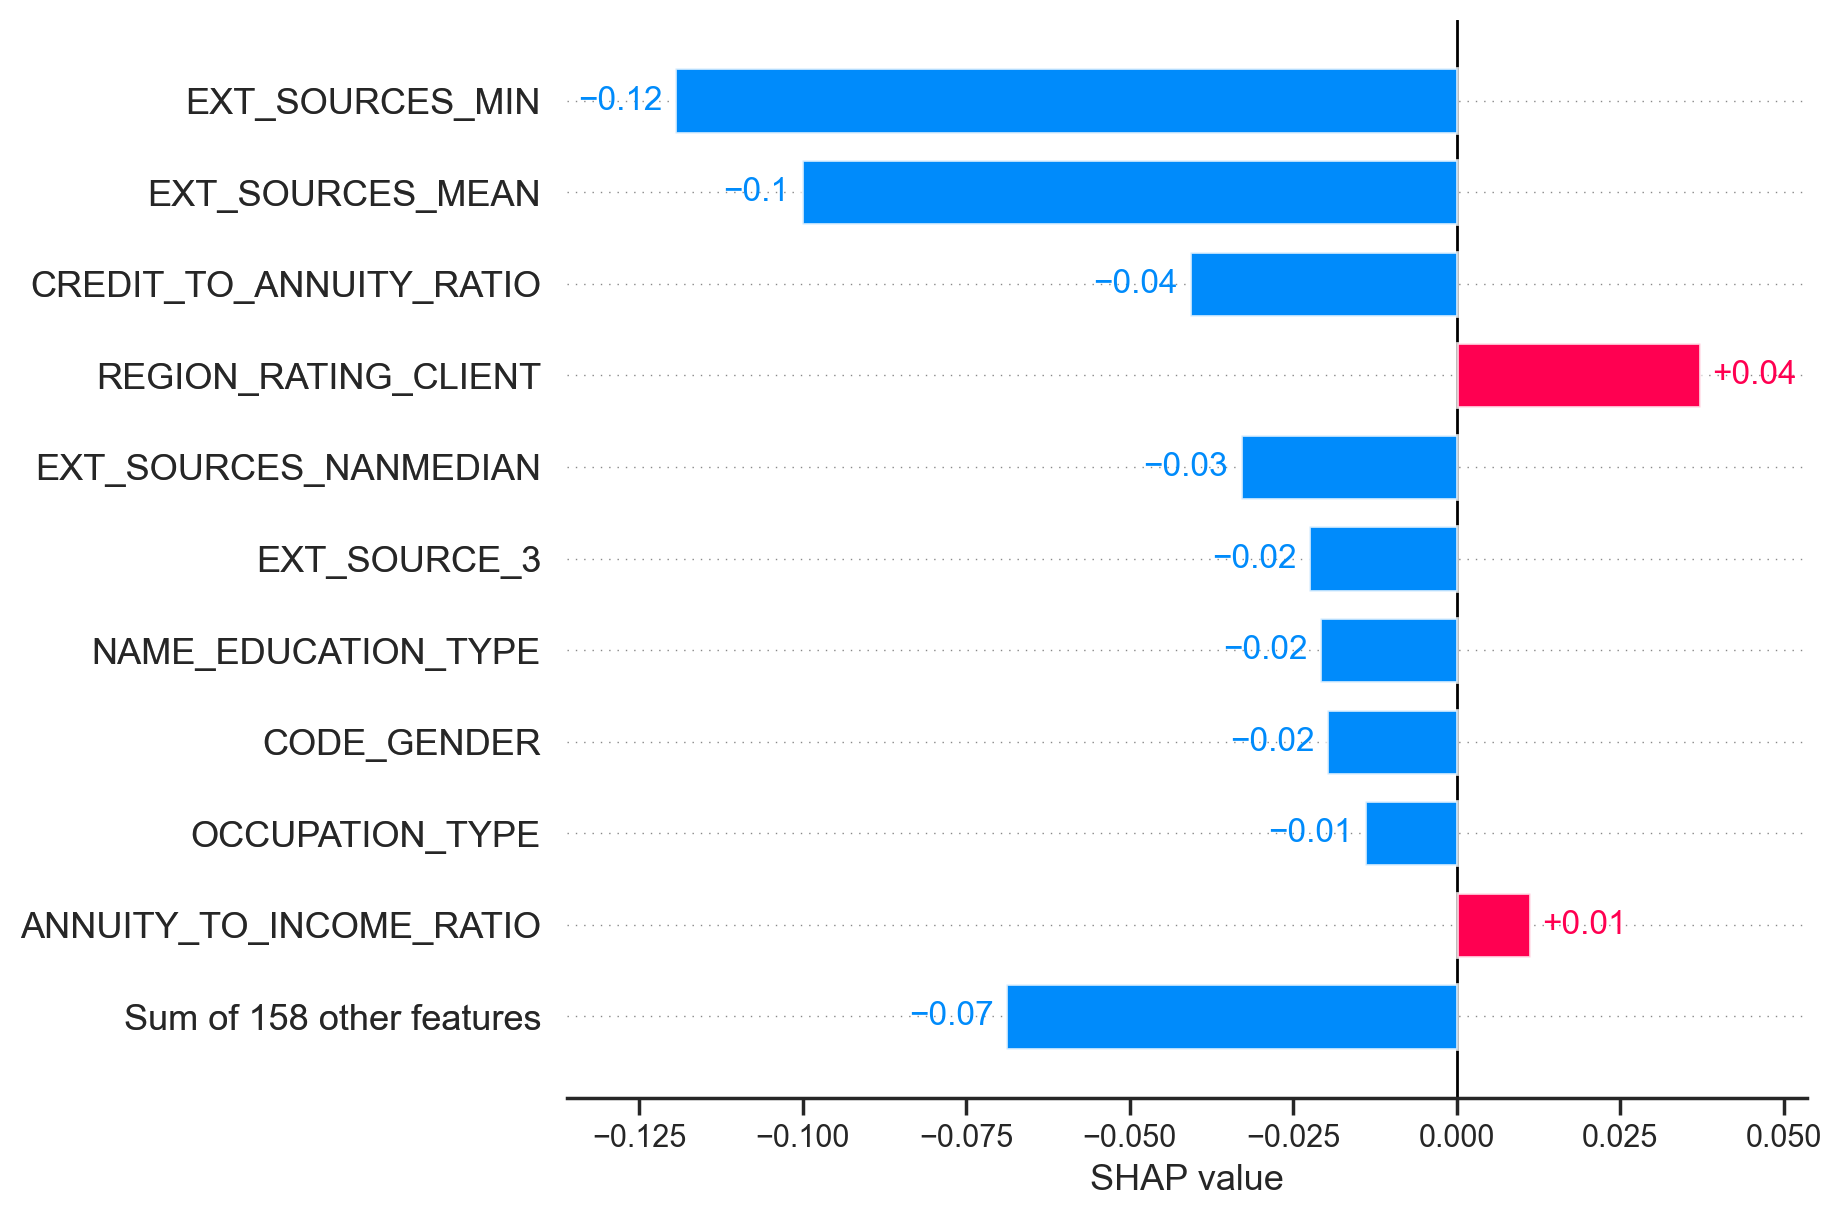

In [25]:
# Method 3 (with the mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations_local[0], max_display=top_ft+1)

__- Force plots__

In [26]:
### Shape 1: Condensed ###

# NB1: f(x) scale coorresponds to the log odd (=> It shoud be <= 0 for positive ).
#      => In order to get the corresponding probability P = 10^(log odd value).
# NB2: .force_plot() seems to be the same as .plots.force().
#shap.plots.force(explainer_shap.expected_value[1], explanations[1], X_test_norm_sp, feature_names=X_TEST.columns)
shap.plots.force(explanations_local[0])

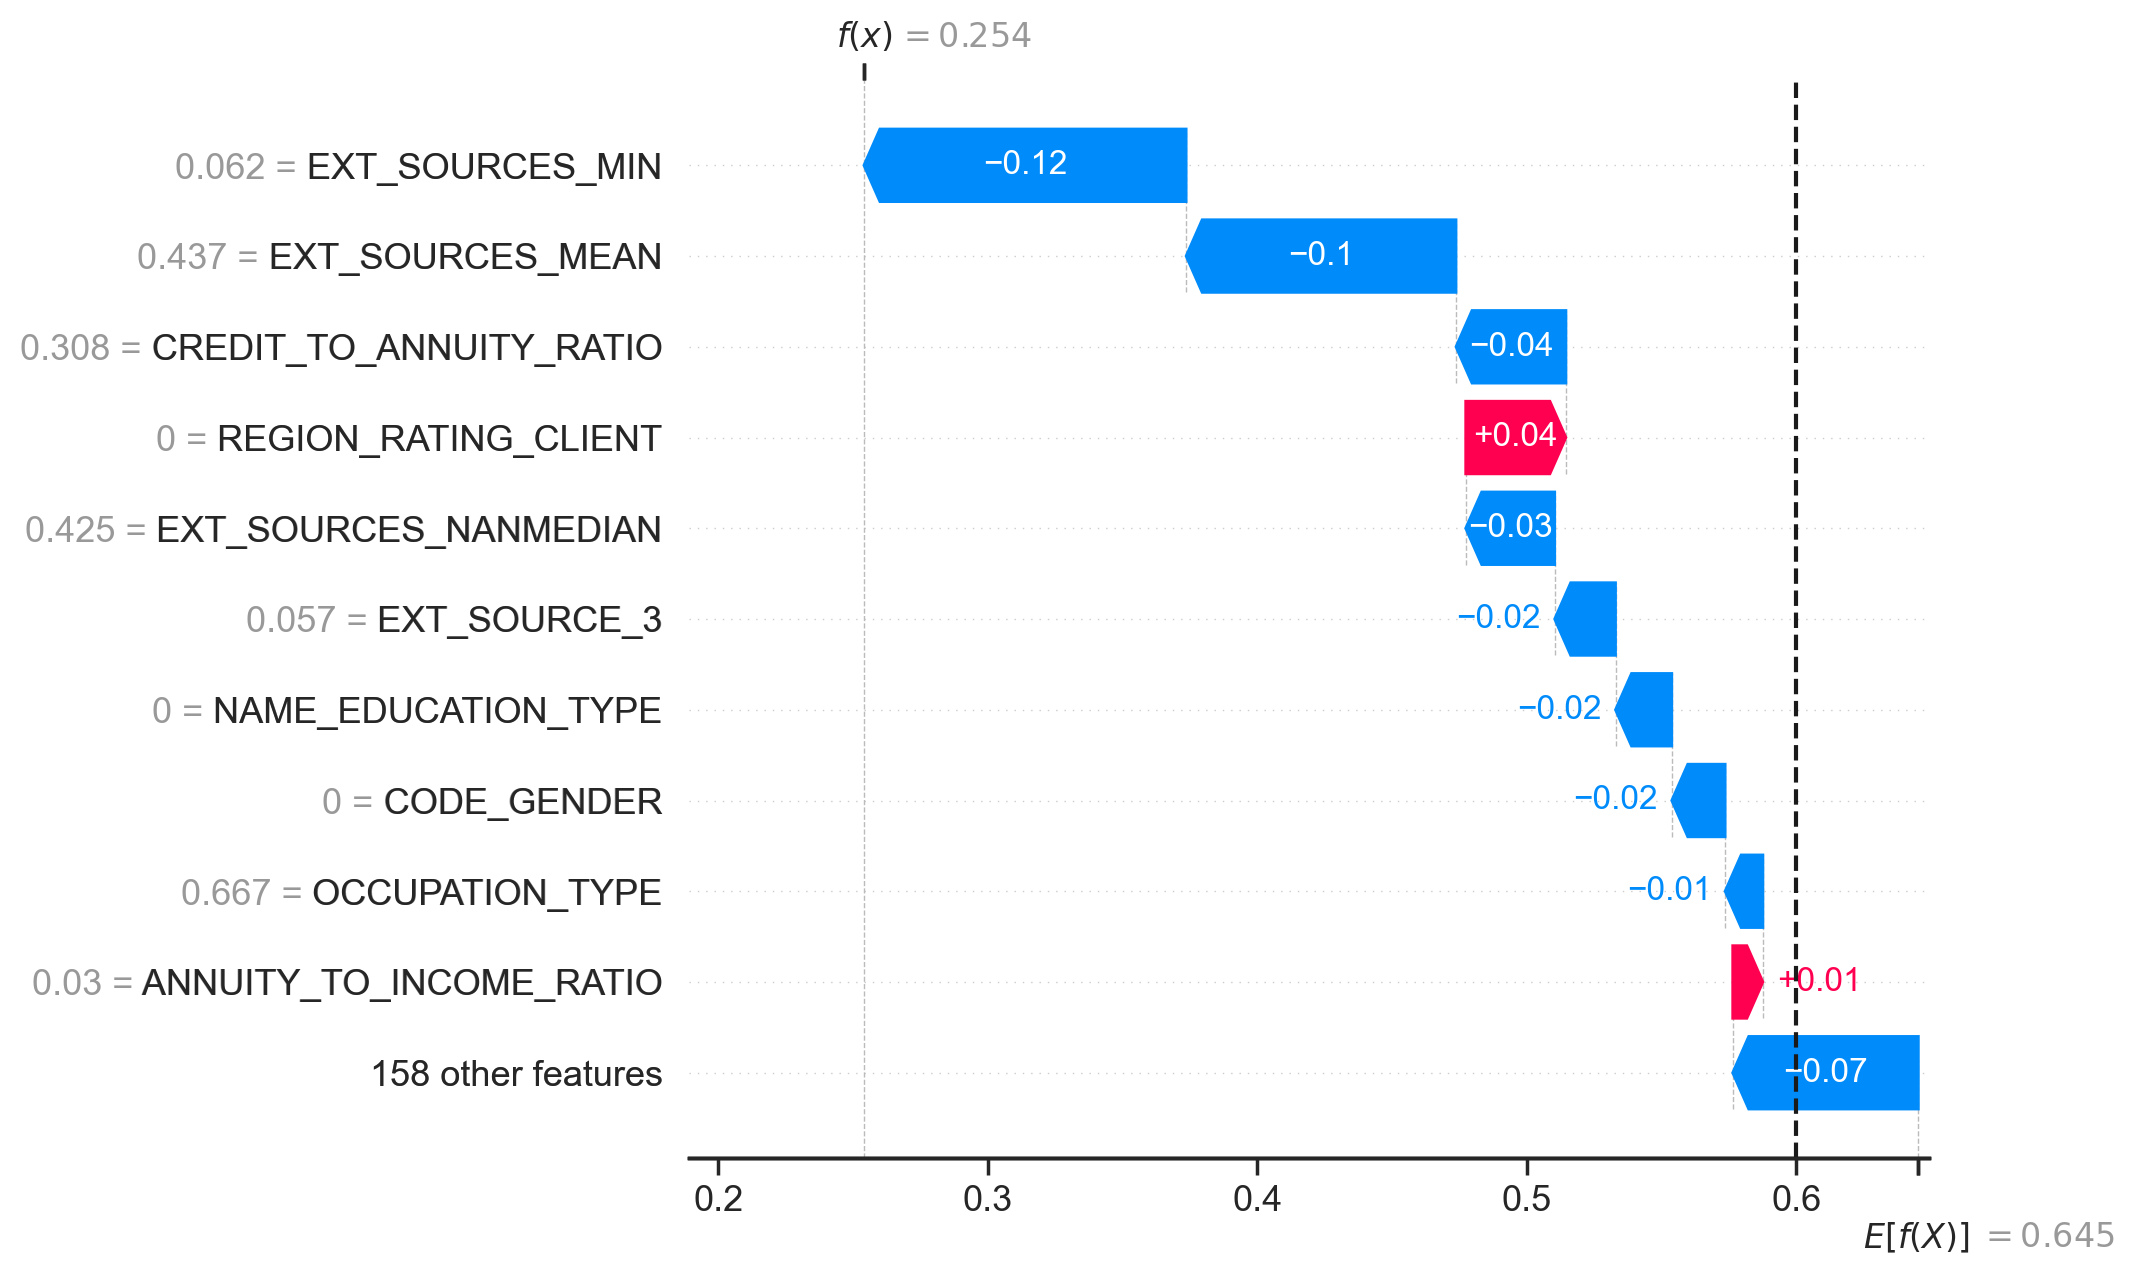

In [27]:
### Shape 2: Detailed ###

# Transform the log odds default model values to their odd counterpart which
# is an easier scale to interpret for none professional people.
# NB: The argument "show=False" allows to not display the graph immediately in order to allows further customization with
#     matplotlib or seaborn or other... before displaying the graph with a "plt.show()".
shap.plots.waterfall(explanations_local[0], top_ft+1, show=False)  
plt.axvline(x=0.6, color='k', linestyle='--')
#plt.xticks()
plt.show()

# III) Data drift analysis: Evidently

## 1) Importation of required libraries

In [28]:
import json

import evidently

#from evidently import ColumnMapping

from evidently.report import Report
#from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset#, TargetDriftPreset, DataQualityPreset, RegressionPreset
from evidently.metrics import *

#from evidently.test_suite import TestSuite
#from evidently.tests.base_test import generate_column_tests
#from evidently.test_preset import DataStabilityTestPreset, NoTargetPerformanceTestPreset, RegressionTestPreset
#from evidently.tests import *

In [29]:
EXPORTS_DATA_DRIFT_DIR_PATH = r'Exports\Data_drift'

## 2) Functions

In [30]:
def jprint (json_text, indent=4, sort_keys=False):
    
    """ Print a python dictionary in a json more readable format. """
    
    # Creates a better formatted string than the default python JSON text.
    json_text_printable = json.dumps(json_text, indent=indent, sort_keys=sort_keys) # NB: sort_keys sorts all elements of the JSON from top to bottom or the reverse.
    print(json_text_printable)

## 3) Data drift

### a) Evidently report

In [31]:
# Get the number of most important features to check for the model.
n_top_fts = len((global_features[global_features >= 0.001]))

# Get the most important features labels.
global_top_fts_labels = global_features.to_frame().index[:n_top_fts]

In [32]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
%%time

# Data drift summary (report).
report_current = Report(metrics=[DataDriftPreset()])
report_current.run(reference_data=X_TRAIN.reset_index(drop=True)[global_top_fts_labels],
           current_data=X_TEST.reset_index(drop=True)[global_top_fts_labels])

In [ ]:
# Show the report.
report_current

### b) Report storage

In [ ]:
# Create or overwrite the file containing the report.
with open(os.path.join(EXPORTS_DATA_DRIFT_DIR_PATH, 'evidently_report.pkl'), "wb") as report_file:
    pickle.dump(report_current, report_file)

# Save the report as an html file.
report_current.save_html(os.path.join(EXPORTS_DATA_DRIFT_DIR_PATH, 'evidently_report.html'))

In [ ]:
STOP

In [47]:
# Load the report from the storage file.
with open(os.path.join(EXPORTS_DATA_DRIFT_DIR_PATH, 'evidently_report.pkl'), "rb") as report_file:
    report_current = pickle.load(report_file)

### c) SHAP values of features with significant data drift
This will allow to see if drifting features are important or negligeable input for the model.

In [48]:
# Get a look at the structure of the evidently report.
jprint(report_current.as_dict())

{
    "metrics": [
        {
            "metric": "DatasetDriftMetric",
            "result": {
                "drift_share": 0.5,
                "number_of_columns": 169,
                "number_of_drifted_columns": 1,
                "share_of_drifted_columns": 0.005917159763313609,
                "dataset_drift": false
            }
        },
        {
            "metric": "DataDriftTable",
            "result": {
                "number_of_columns": 169,
                "number_of_drifted_columns": 1,
                "share_of_drifted_columns": 0.005917159763313609,
                "dataset_drift": false,
                "drift_by_columns": {
                    "AGE_RANGE": {
                        "column_name": "AGE_RANGE",
                        "column_type": "num",
                        "stattest_name": "Jensen-Shannon distance",
                        "stattest_threshold": 0.1,
                        "drift_score": 0.010632678040589573,
                        "d

In [50]:
# Get the section in which search in report.
search_section = report_current.as_dict()['metrics'][1]['result']['drift_by_columns']

# Get the list of features with significant data drift.
l_drift_features = [feature for feature in search_section.keys() if search_section[feature]['drift_detected']]

# Check the shap values of features with significant data drift.
print("SHAP values of features with significant data drift:")
df_shap_values_drifted_features = global_features[l_drift_features].to_frame().rename({0: 'absolute_shap_values'}, axis='columns')

# Set the dataframe style in order to highlight top features for the model which drifted.
df_shap_values_drifted_features = df_shap_values_drifted_features.style.apply(highlight_top_features, shap_value_thr=top_10_shap_value_thr)
df_shap_values_drifted_features

SHAP values of features with significant data drift:


absolute_shap_values
CREDIT_TO_GOODS_RATIO                   0.0

## 4) Simulation overtime

### a) Functions

In [37]:
def select_time_period (df, range_limit_min = 0, range_limit_max = 0, time_period_col = 'DAYS_REGISTRATION'):
    
    """
    Description
    -----------
    Reduce the dataframe in the desired time period partition.
    
    Parameters
    ----------
    df: pandas.Dataframe()
        Dataframe to process.
    time_period_col: str
        Column's name in which to get the datetimes.

    Return: pandas.DataFrame()
    ------
    Returns the selected partition.
        
    """
          
    # Get the partition.
    df = df[(df[time_period_col] <= -range_limit_min * 365.25) &
            (df[time_period_col] >= -range_limit_max * 365.25)]
    
    # Display the partition datetime's range.
    print("Partition period: [%.2f, %.2f] => %.2f" %
          (abs(df['DAYS_REGISTRATION'].min() / 365.25), 
           abs(df['DAYS_REGISTRATION'].max() / 365.25),
           abs(df['DAYS_REGISTRATION'].min() / 365.25) - abs(df['DAYS_REGISTRATION'].max() / 365.25)),
          "years"
          )
    print("Number of customers within the partition:", df.shape[0])
   
    return df

In [45]:
def highlight_top_features (df, shap_value_thr):
        
    """ Highlight the most important features for the model. """
    
    # NB: Color the text in black if an else is reqiured tu fill white spaces (color: #000000).
    return ['background-color: salmon' if df.iloc[i] >= shap_value_thr else '' for i in range(df.shape[0])] # Red color: #E8000B

### b) Simulation

In [38]:
mean_days_per_month = np.mean([31]*7 + [30]*4 + [28])

total_period_range = round(abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25), 2)
print("Longest registered customer of the train set:", round(abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25), 2), "years")
print("Shortest registered customer of the train set:", abs(X_TRAIN['DAYS_REGISTRATION'].max()), "day")
print("Total period range:", round(abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25), 2), "years")

Longest registered customer of the train set: 58.17 years
Shortest registered customer of the train set: 0 day
Total period range: 58.17 years


In [112]:
%%time

# Set time periods.
period_start = 20 # Period of the reference. NB: in order to get enough customers as reference.
period_step = 2 # Period of time between each data drift test.

# Get the oldest registration time of the train set.
oldest_registration = abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25)

# Selected reference partition within the train set.
count = 0 # Give a number to each partition.
print("- Reference partition #%i:" % count)
partition_ref = select_time_period(X_TRAIN, oldest_registration - period_start, oldest_registration)
print()

# Initialize the evidently data drift report.
#report_simulation = Report(metrics=[DataDriftPreset(cat_stattest='ks', drift_share=0.33)]) #cat_statest_threshold=0.05,

l_reports = []
#l_reports_periods = []
l_n_drifted_features = []
drift_share = 0.33
l_periods = abs(np.arange(-oldest_registration + period_start, period_step, period_step) + oldest_registration - period_start)
for period in l_periods:
    
    # Set the low limit of the period range to consider.
    range_limit_min = oldest_registration - period_start - period
    range_limit_max = oldest_registration #- period # NB: Commenting or not this row allows to take into account the previous partitions into the new one or not.

    # Selected current test partition within the test set.
    print("- Current partition #%i:" % count)
    partition_curr = select_time_period(X_TRAIN, range_limit_min, range_limit_max)
    
    # Data drift summary (report).
    # NB: Report is re-initialize at each iteration for easier management and display of the HTML table.
    report_simulation = Report(metrics=[DataDriftPreset(cat_stattest='ks', drift_share=drift_share)]) #cat_statest_threshold=0.05,
    report_simulation.run(reference_data=partition_ref.reset_index(drop=True)[global_top_fts_labels],
                          current_data=partition_curr.reset_index(drop=True)[global_top_fts_labels])
    
    # Get the number of detected drifted features for the partition.
    l_reports.append(([range_limit_min, range_limit_max], report_simulation))
    #l_reports_periods.append((range_limit_min, range_limit_max))
    l_n_drifted_features.append(report_simulation.as_dict()['metrics'][0]['result']['number_of_drifted_columns']) #[0] => [count]
    print("Number of drifted features found:", l_n_drifted_features[count])
    
    # Update the partition number.
    count += 1
    
    print()
    
print("Number of drifted features found all over the full simulation period:\n", l_n_drifted_features)
print()

- Reference partition #0:
Partition range time: [58.17, 38.18] => 20.00 years
Number of customers within the partition: 220

- Current partition #0:
Partition range time: [58.17, 38.18] => 20.00 years
Number of customers within the partition: 220
Number of drifted features found: 0

- Current partition #1:
Partition range time: [58.17, 36.18] => 21.99 years
Number of customers within the partition: 415
Number of drifted features found: 4

- Current partition #2:
Partition range time: [58.17, 34.19] => 23.98 years
Number of customers within the partition: 656
Number of drifted features found: 6

- Current partition #3:
Partition range time: [58.17, 32.18] => 26.00 years
Number of customers within the partition: 1019
Number of drifted features found: 15

- Current partition #4:
Partition range time: [58.17, 30.18] => 27.99 years
Number of customers within the partition: 1430
Number of drifted features found: 17

- Current partition #5:
Partition range time: [58.17, 28.19] => 29.98 years


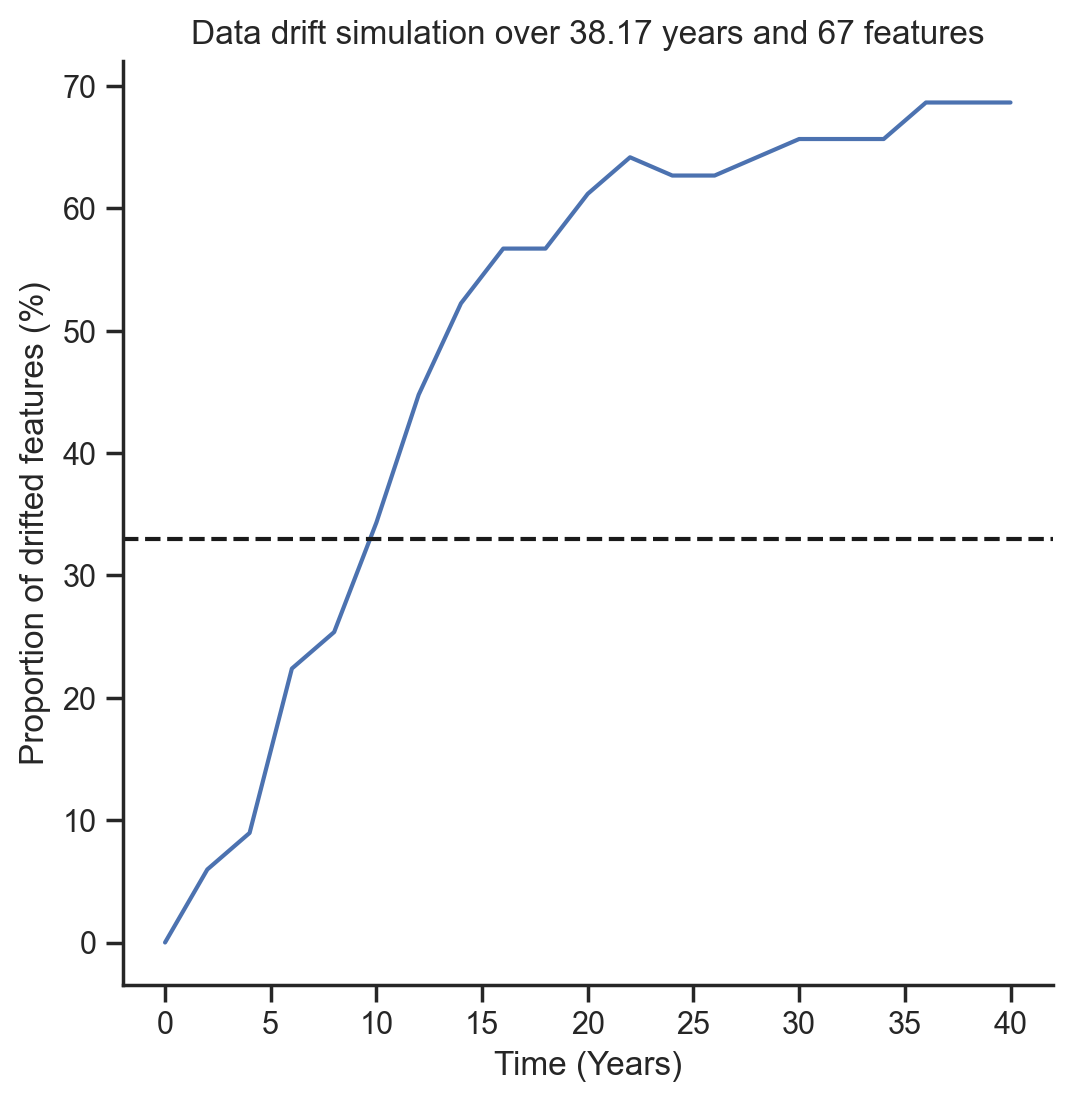

In [113]:
# Draw the figure of the simulated data drift overtime.
plt.plot(l_periods, (np.array(l_n_drifted_features) / n_top_fts * 100), color='b')
plt.title("Data drift simulation over %.2f years and %i features" % ((total_period_range - period_start), n_top_fts))
plt.xlabel("Time (Years)")
plt.ylabel("Proportion of drifted features (%)") #"Number of drifted features"
plt.axhline(drift_share * 100, color='k', linestyle='--')
plt.show()

### c) Results

#### i. Shows the HTML table of the last report

In [117]:
# Select the year corresponding the detection of the dataset drift.
select_year = 10

# Display the correpsonding HTML table.
l_reports[int(round(select_year / period_step, 0))][1]
#report_simulation

#### ii. Checking the importance of the drifted features

In [115]:
# Get the section in which search in report.
search_section = l_reports[int(round(select_year / period_step, 0))][1].as_dict()['metrics'][1]['result']['drift_by_columns']

# Get the list of features with significant data drift.
l_drift_features = [feature for feature in search_section.keys() if search_section[feature]['drift_detected']]

# Check the shap values of features with significant data drift.
print("SHAP values of the %i features with a significant data drift after %.2f:" % (len(l_drift_features), select_year))
df_shap_values_drifted_features = global_features[l_drift_features].sort_values(ascending=False).to_frame().rename({0: 'absolute_shap_values'}, axis='columns')

# Set the dataframe style in order to highlight top features for the model which drifted.
df_shap_values_drifted_features = df_shap_values_drifted_features.style.apply(highlight_top_features, shap_value_thr=top_10_shap_value_thr)
df_shap_values_drifted_features

SHAP values of the 23 features with a significant data drift after 10.00:


In [ ]:

for i, idx in enumerate(range(len(clf.predict_proba(X_test_norm)))):
    #print(clf.predict_proba(X_test_norm)[0])
    if clf.predict_proba(X_test_norm)[i][0] < 0.3:
        print(idx, clf.predict_proba(X_test_norm)[i])